# Google Analytics Capstone Project

This data analysis work is done as a Capstone project for the Google Data Analytics course. The objective of the project is to demonstrate the learning during the course and put to practice the data analytics process using a case study. The project follows the Ask, Prepare, Process, Analyse, Share and Act steps in data analysis steps as detailed in the course.

## 1. Ask Phase
1.1 Business Problem
Bellabeat wants to know the best way to market and position their smart device in the market. They want to would like to  apply insights from smart device usage of from competitors smart devices. Recommendations arising from these insights will be used to inform t he Bellabeat marketing team.

1.2 Key Stakeholders:

* Urška Sršen: Bellabeat’s co-founder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s co-founder
* Bellabeat marketing analytics team:

## 2. Prepare Phase
2.1 Dataset information

* [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (Kaggle, CC0: Public Domain, by Mobius)
* 18 .csv files, both in long and wide format
* Data was collected from 30 FitBit users with consent
* Data collection period: 12 Apr 2016 - 12 May 2016

2.2 Dataset ROCC

* Reliability:  Most datasets on Kaggle.
* Original: Third party data collected via Amazon Mechanical Turk. May not be credible for real world analysis application 
* Comprehensiveness: Limited sample size of 30. Insufficient to represent the population. The dataset doesn't have sufficient metadata
* Current: Data collected in 2016, and is no longer considered current but is adequate for the purpose of this case study
* Cited: Not cited but over 500 analysis have been done using this dataset at the time of carrying out this analysis

## 3. Process Phase
Although the course covers several tools for data analysis, R is the tool of choice for this project.
While the dataset provides a range of tracked variables this analysis will focus on **Activity** and **Sleep** data.

3.1 Install and load necessary R packages

In [1]:
library(tidyverse)
library(readr)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




3.2 Read and load the needed tables 

In [2]:
# Load csv files 
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 413 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



3.3 Explore tables

In [3]:
# Exploring daily activity table
head(daily_activity)
str(daily_activity)

# Exploring sleep table
head(sleep_day)
str(sleep_day)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spec_tbl_df [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


3.4 Data Cleaning & transformation

The date columns in both tables are not in the correct date/date-time formats

In [4]:
# Cleaning daily activity table
# Format date column correctly and include calculatred column 'TotalActiveTime'

new_daily_activity <- daily_activity %>%
  distinct() %>% 
  mutate(ActivityDate=mdy(ActivityDate)) %>%
  mutate(TotalActiveTime = VeryActiveMinutes+FairlyActiveMinutes+
           LightlyActiveMinutes) %>% 
  group_by(Id, ActivityDate)
head(new_daily_activity)

# Cleaning sleep_day table
# Formating date column correctly

new_sleep_day <- sleep_day %>%
  distinct() %>% 
  mutate(SleepDay=mdy_hms(SleepDay)) %>% 
  group_by(Id)
head(new_sleep_day)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveTime
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,366
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,257
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,222
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,272
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,267
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,222


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


3.4 Quick exploration of datasets

Numbers of users and observations in the dataframes

In [5]:
# distinct users in each df
n_distinct(new_daily_activity$Id)
n_distinct(new_sleep_day$Id)

# observations in each dataframe
nrow(daily_activity)
nrow(sleep_day)

[1] 33

[1] 24

[1] 940

[1] 413

There is a difference in the number of unique participant Id's in the daily_activity  and the sleep_day dataframes, 33 for the former and only 24 for the latter. Meaning not all the participants tracked their sleep activity compared to their daily activity.

Some summary statistics of both dataframes

In [6]:
# daily activity dataframe
new_daily_activity %>%
  select(TotalSteps,
         TotalDistance,
         TotalActiveTime,
         SedentaryMinutes) %>%
  group_by(Id, ActivityDate) %>% 
  summary()

# sleep_day dataframe
new_sleep_day %>%  
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed) %>%
  summary()

Adding missing grouping variables: `Id`, `ActivityDate`



       Id             ActivityDate          TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
 TotalActiveTime SedentaryMinutes
 Min.   :  0.0   Min.   :   0.0  
 1st Qu.:146.8   1st Qu.: 729.8  
 Median :247.0   Median :1057.5  
 Mean   :227.5   Mean   : 991.2  
 3rd Qu.:317.2   3rd Qu.:1229.5  
 Max.   :552.0   Max.   :1440.0  

Adding missing grouping variables: `Id`



       Id            TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.504e+09   Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:3.977e+09   1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :4.703e+09   Median :1.00      Median :432.5      Median :463.0  
 Mean   :4.995e+09   Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:6.962e+09   3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :8.792e+09   Max.   :3.00      Max.   :796.0      Max.   :961.0  

## 4. Analyze Phase

4.1 Explore the **new_daily_activity dataset**

First we look at how average minutes for different activity intensity is spread

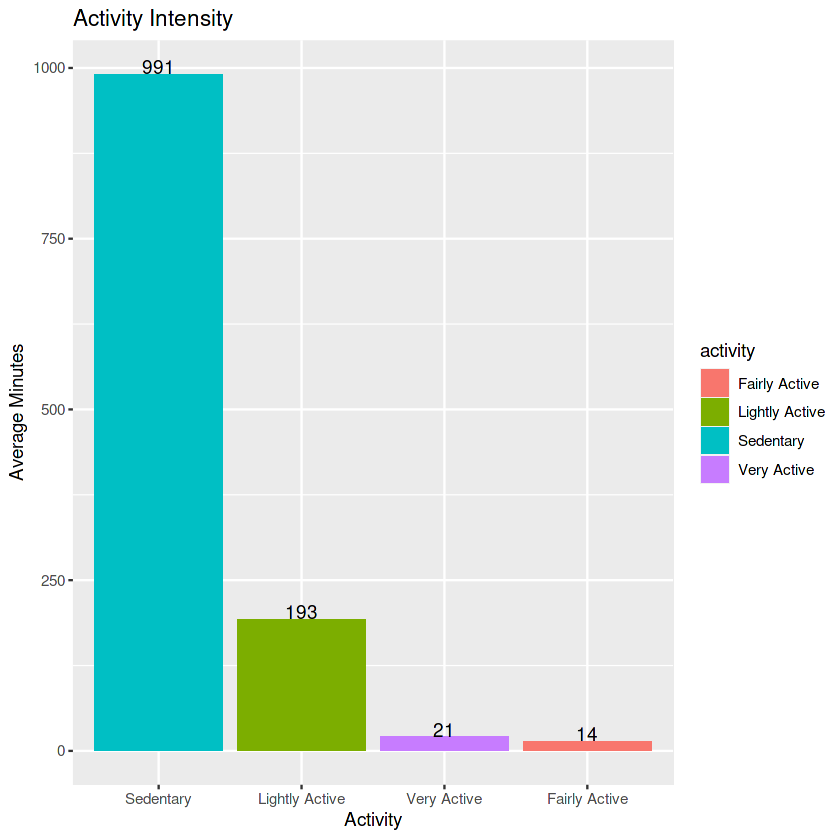

In [7]:
# Calculating average minutes for each intensity level
avg_very_active_min <- mean(new_daily_activity$VeryActiveMinutes)
avg_fairly_active_min <- mean(new_daily_activity$FairlyActiveMinutes)
avg_ligthly_active_min <- mean(new_daily_activity$LightlyActiveMinutes)
avg_sedentary_min  <- mean(new_daily_activity$SedentaryMinutes)

# Creating a new dataframe to make a plot
average_minutes_df <- data.frame(activity= c("Very Active", "Fairly Active", 
                                             "Lightly Active", "Sedentary"), 
                                 minutes= c(avg_very_active_min,avg_fairly_active_min,
                                            avg_ligthly_active_min,avg_sedentary_min)) %>% 
  mutate_if(is.numeric, round, digit = 0) #Rounding the minutes to integers

# Plotting a bar graph
ggplot(data=average_minutes_df,aes(x=reorder(activity, -minutes), y=minutes, fill=activity) ) +
  geom_bar(stat = 'identity')+
  labs(title= "Activity Intensity", x="Activity",y="Average Minutes")+
  geom_text(aes(label = minutes), vjust = 0)

From the abovegraph, we observe that users spend a large proportion of the logged time sedentary. The Centre for Disease Prevention and Control, CDC, recommends that adults get at least 150 minutes of moderate-intensity aerobic physical activity or 75 minutes of vigorous-intensity physical activity, or an equivalent combination each week. <https://www.cdc.gov/physicalactivity/walking/index.htm>


To help users to achieve the desired activity time, we will explore the relationship between SedentaryMinutes and other columns to see if there are any correlations. 

Exploring  relationship between Sedentary minutes and Total Steps


	Pearson's product-moment correlation

data:  new_daily_activity$TotalSteps and new_daily_activity$SedentaryMinutes
t = -10.615, df = 938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3833971 -0.2691782
sample estimates:
       cor 
-0.3274835 


`geom_smooth()` using formula 'y ~ x'



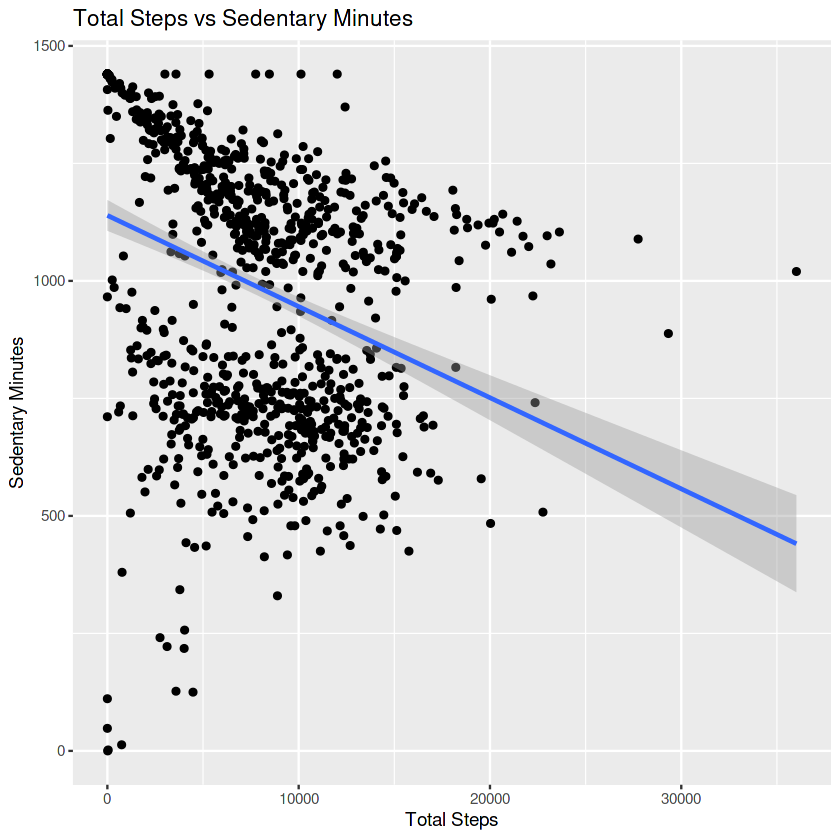

In [8]:
#Correlation test between Total steps and Sedentary minutes
cor.test(new_daily_activity$TotalSteps,new_daily_activity$SedentaryMinutes)

# Plotting total steps vs sedentary minutes
ggplot(data=new_daily_activity, aes(x=TotalSteps, y=SedentaryMinutes)) + 
  geom_point() +
  geom_smooth(method = 'lm') +
  labs(title= "Total Steps vs Sedentary Minutes",  x="Total Steps", y="Sedentary Minutes")

We see a fair negative correlation between sedentary minutes and total steps R = -0.327. A negative correlation means we expect to see a decrease in sedentary minutes with an increase in total steps. It's also important to note that a correlation does not equal causation. 
This may be important to note for Bellabeats marketing strategy. Our smart device can suggest a certain number of steps to improve the sedentary minutes

Next we check the relationship between Total steps and Total active minutes


	Pearson's product-moment correlation

data:  new_daily_activity$TotalActiveTime and new_daily_activity$TotalSteps
t = 37.249, df = 938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7452981 0.7970065
sample estimates:
      cor 
0.7724293 


`geom_smooth()` using formula 'y ~ x'



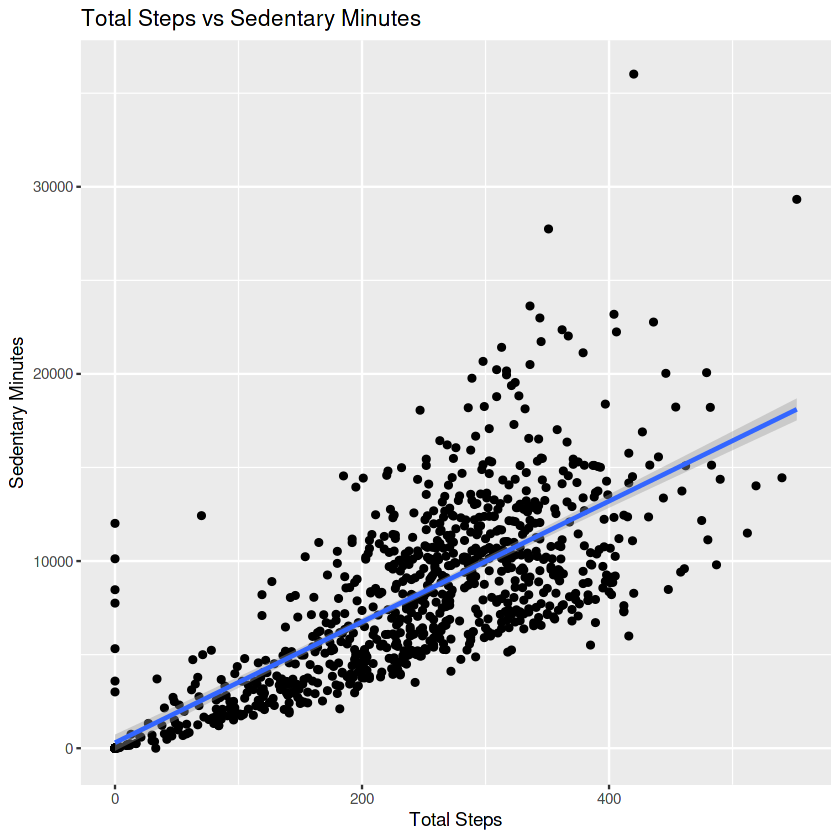

In [9]:
# Correlation test between Total active time and Total steps
cor.test(new_daily_activity$TotalActiveTime,new_daily_activity$TotalSteps)

# Plotting total steps vs total active time
ggplot(data = new_daily_activity, aes(x=TotalActiveTime, y=TotalSteps))+
  geom_point() + 
  geom_smooth(method = 'lm') +
  labs(title= "Total Steps vs Sedentary Minutes",  x="Total Steps",y="Sedentary Minutes")

We observe a very strong positive correlation between total active time and total steps, R = 0.772. Hence by increasing total steps the total active minutes will also increase. Helping the users achieve the recommended active time. 

4.2 Explore the *sleep_day dataset*

First we look at the relationship between minutes asleep and time in bed


	Pearson's product-moment correlation

data:  new_sleep_day$TotalTimeInBed and new_sleep_day$TotalMinutesAsleep
t = 51.28, df = 408, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9161262 0.9423551
sample estimates:
      cor 
0.9304224 


`geom_smooth()` using formula 'y ~ x'



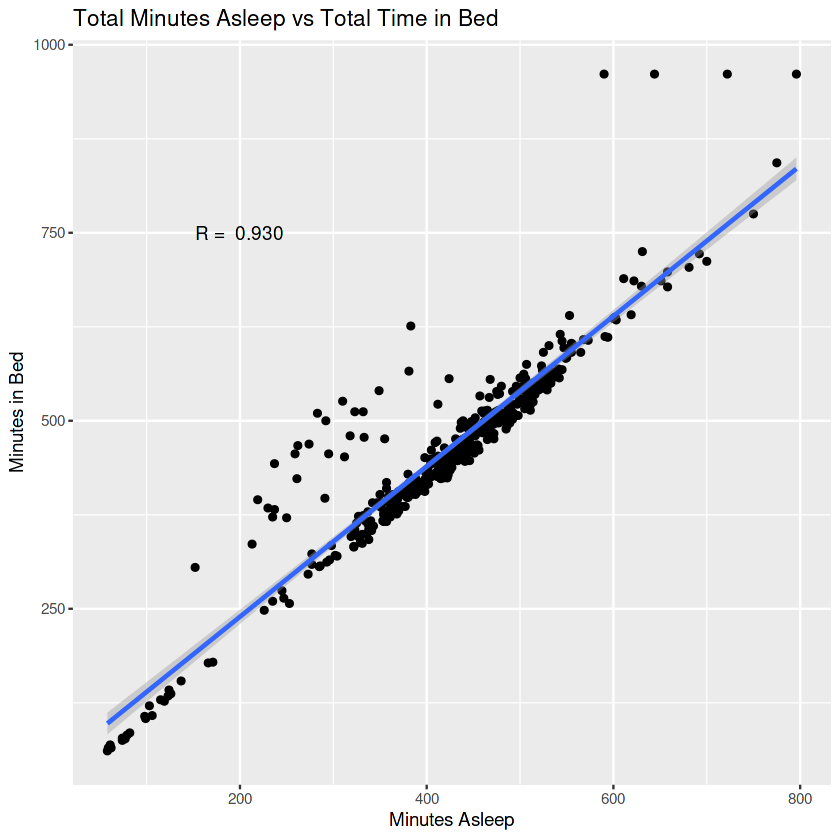

In [10]:
# Correlation test between Total minutes asleep and Total time in bed
cor.test(new_sleep_day$TotalTimeInBed,new_sleep_day$TotalMinutesAsleep)

# Plotting minutes asleep vs time in bed
ggplot(data=new_sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point() +
  geom_smooth(method='lm') +
  labs(title= "Total Minutes Asleep vs Total Time in Bed ",  x="Minutes Asleep",y="Minutes in Bed") +
  annotate ("text", x=200, y=750, label="R =  0.930")

We see a strong positive correlation(R = 0.930) as expected between these two variables. However, we also observe a number of outliers where time in bed iis much more that total minutes asleep. This could be a potential area of improvement where Bellabeats device can improve on amount of sleep the user gets.


Next we categorize the TotalMinutesAsleep column to determine if the participants are getting adequate sleep. 

In [11]:
# Categorising the hours of sleep
new_sleep_day_1 <- mutate(new_sleep_day, SleepAdequacy = case_when(
  TotalMinutesAsleep < 300 ~ "< 5hrs",
  TotalMinutesAsleep >=300 & TotalMinutesAsleep < 420 ~ "5-7hrs",
  TotalMinutesAsleep >= 420 & TotalMinutesAsleep < 540 ~ "7-9hrs",
  TotalMinutesAsleep > 540 ~ "+9hr"))
head(new_sleep_day_1)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepAdequacy
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,5-7hrs
1503960366,2016-04-13,2,384,407,5-7hrs
1503960366,2016-04-15,1,412,442,5-7hrs
1503960366,2016-04-16,2,340,367,5-7hrs
1503960366,2016-04-17,1,700,712,+9hr
1503960366,2016-04-19,1,304,320,5-7hrs


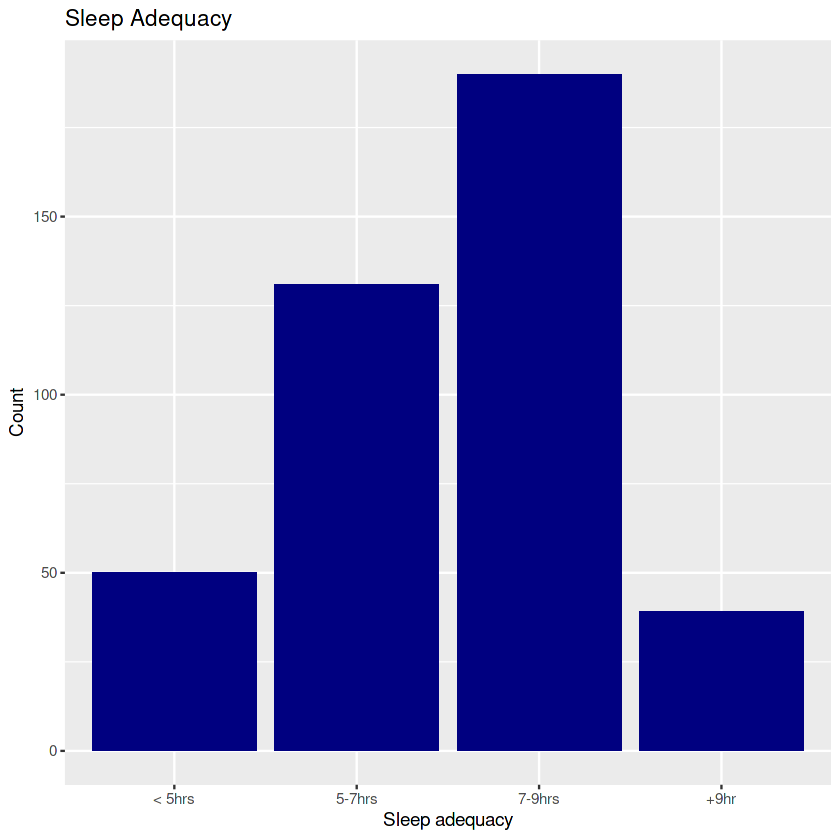

In [12]:
# Plotting Sleep Adequacy
new_sleep_day_1$SleepAdequacy = factor(new_sleep_day_1$SleepAdequacy, levels = c('< 5hrs', '5-7hrs', '7-9hrs','+9hr')) 

ggplot(data=new_sleep_day_1,aes(x=SleepAdequacy)) +
  geom_bar(fill='navy') +
  labs(title= "Sleep Adequacy", x="Sleep adequacy",y="Count")

Although a large proportion of the sample population get adequate here is also a fair proportion fall below the recommended the 5 to 7hr category. <https://www.cdc.gov/sleep/features/getting-enough-sleep.html>

This is another improvement area for user experinecet the Bellabeat marketing team can focus on.


4.3 Combining the datasets
Next we combine the dataframes to see if there any new insights a combined dataframe can provided.

In [13]:
# Merging the datasets
combined_data <- left_join(new_daily_activity,new_sleep_day, by= c("Id"="Id", "ActivityDate"="SleepDay"))

head(combined_data)
n_distinct(combined_data$Id)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveTime,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,366,1,327,346
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,257,2,384,407
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,222,NA,NA,NA
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,272,1,412,442
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,267,2,340,367
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,222,1,700,712


[1] 33

In [14]:
# Creating a dataframe of averages
avg_combined_data <- combined_data %>% 
  group_by(Id) %>% 
  drop_na() %>% 
  summarise(avg_total_active=mean(TotalActiveTime),avg_sedentary= mean(SedentaryMinutes),
            avg_total_minutes_asleep=mean(TotalMinutesAsleep),avg_time_in_bed=mean(TotalTimeInBed), 
            avg_total_steps=mean(TotalSteps))
head(avg_combined_data)

Id,avg_total_active,avg_sedentary,avg_total_minutes_asleep,avg_time_in_bed,avg_total_steps
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,291.3200,759.2800,360.2800,383.2000,12405.680
1644430081,263.2500,920.5000,294.0000,346.0000,7967.750
1844505072,147.3333,443.3333,652.0000,961.0000,3477.000
1927972279,85.0000,977.2000,417.0000,437.8000,1490.000
2026352035,256.8929,653.9643,506.1786,537.6429,5618.679
2320127002,242.0000,1129.0000,61.0000,69.0000,5079.000


`geom_smooth()` using formula 'y ~ x'



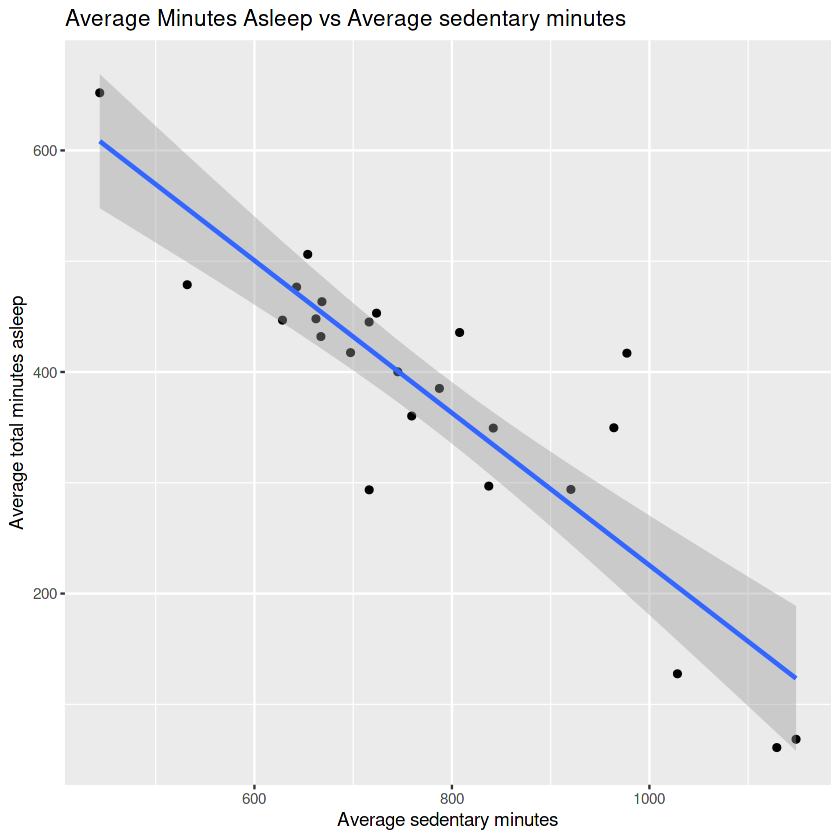

In [15]:
# Plotting average sedentary miinutes vs average total minutes asleep
ggplot(data=avg_combined_data, aes(x=avg_sedentary, y=avg_total_minutes_asleep)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  labs(title = 'Average Minutes Asleep vs Average sedentary minutes', 
       x='Average sedentary minutes', y= 'Average total minutes asleep')

We see strong negative correlation between average sedentary minutes and average total minutes asleep. Meaning sedentary minutes can be improved on by users having adequate sleep. 

## Share & Act Phase
5.1 Findings

* Not all users were consistent in tracking their wellness data

5.1.1. Daily Activity

* Users were on average more sedentary ~991min daily. Most did not hit the CDC's recommendation of 150min of moderate activity.
* This can be improved by increasing Total steps taken which has a relative strong positive correlation of 0.772 with total active time.

5.1.2 Sleep

* Approximately half of the users had adequate sleep time of the recommended 7hr or more for adults, as recommended by CDC.
* Average total time asleep had a very strong negative correlation with sedentary time in bed of 0.930.

5.1.3 Combined data

* There is a strong negative correlation of 0.884 between the average of total minutes asleep and the average of minutes being sedentary. 
* Improving adequate sleep improves activity time.

5.2. Recommendations
Bellabeat marketing team focus should be on features that improve identified user experience gaps in this analysis.

* Ensuring users are consistent in logging their vitals
* Increase in users daily steps and active minutes
* Reduce gap in time in bed vs sleep time 

5.3. Limitations

* Data was from 2016, more current data is required. Changing economical and social climate may have an effect of wellness.
* Data was only collected for a duration of 1 month. Trends are not reflective of users lifestyle 
* Sample size was only of 24-33 and not representative of the entire population of smart device users and risks bias in conclusions.
* There was no demographic information of users data was collection from, eg. age and gender. This may result in inaccuracies when Bellabeats marketing strategy is targeted to the female population
* Data collected should include all fields tracked by Bellabeat devices, especially those catered to the female population. This will allow a better trend analysis to target the desired market.